Tim Zhao
PHYS 1600 Computational Physics HW2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Write a program to calculate and compare the behavior of two, nearly identical, non-linear pendulums. Use it to calculate the divergence of two nearby trajectories ($\Delta \theta$) in the chaotic regime and make a qualitative estimate of the corresponding Lyapunov exponent from the slope of a plot of log ($\Delta \theta$) as a function of $t$. Reasonable parameters to place the pendulum in the chaotic regime are: $l = g = 9.8,~\Omega_D = 0.6,~F_D=1.1,~\nu = 0.5$

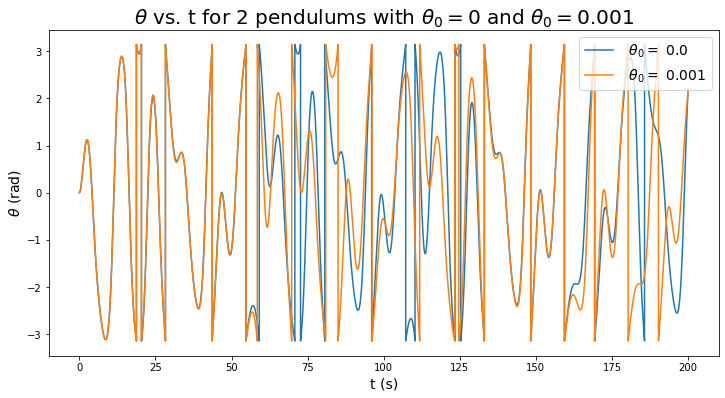

In [53]:
from Particle1D_2 import Pendulum
p1 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0, tf= 200, dt = 1e-3)
p2 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0.001, tf= 200, dt = 1e-3)
p1.scipy_trajectory()
p2.scipy_trajectory()

fig = plt.figure(figsize = [12,6])
plt.plot(p1.tarray, p1.xv[:,0], label = ' $\\theta_0 =$ {}'.format(0.0))
plt.plot(p2.tarray, p2.xv[:,0], label = ' $\\theta_0 =$ {}'.format(0.001))
plt.ylabel('$\\theta$ (rad)', fontsize = 14)
plt.xlabel('t (s)', fontsize = 14)
plt.legend(loc='best',fontsize=14)
plt.title('$\\theta$ vs. t for 2 pendulums with $\\theta_0 =0$ and $\\theta_0 =0.001$', fontsize = 20)
plt.show()

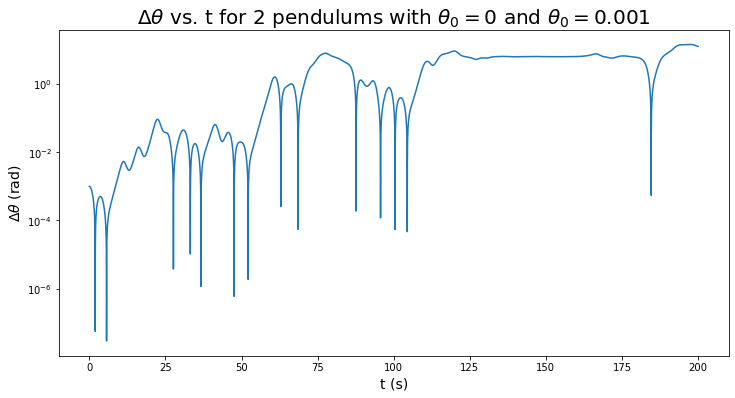

In [54]:
delta_theta1=np.abs(p1.xv_unwrap[:,0] - p2.xv_unwrap[:,0])

fig = plt.figure(figsize = [12,6])
plt.semilogy(p1.tarray, delta_theta1,)
plt.ylabel('$\Delta \\theta$ (rad)', fontsize = 14)
plt.xlabel('t (s)', fontsize = 14)
plt.title('$\Delta \\theta$ vs. t for 2 pendulums with $\\theta_0 =0$ and $\\theta_0 =0.001$', fontsize=20)
plt.show()

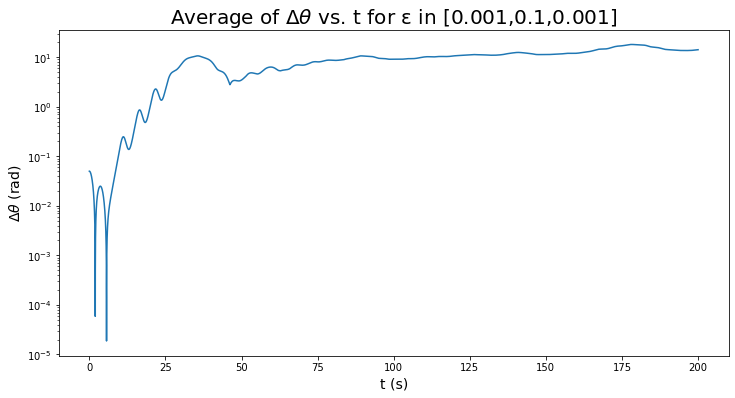

In [56]:
epsilon=np.arange(0.001,0.1,0.001)
for e in epsilon:
    if e == epsilon[0]:
        p1 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0.0, tf= 200, dt = 1e-3)
        p2 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0.0+e, tf= 200, dt = 1e-3)
        p1.scipy_trajectory()
        p2.scipy_trajectory()
        tot_diff=np.abs(p1.xv_unwrap[:,0] - p2.xv_unwrap[:,0])
    else:
        p1 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0.0, tf= 200, dt = 1e-3)
        p2 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0.0+e, tf= 200, dt = 1e-3)
        p1.scipy_trajectory()
        p2.scipy_trajectory()
        tot_diff+=np.abs(p1.xv_unwrap[:,0] - p2.xv_unwrap[:,0])

avg_diff=tot_diff/len(epsilon)
fig = plt.figure(figsize = [12,6])
plt.semilogy(p1.tarray, avg_diff)
plt.ylabel('$\Delta \\theta$ (rad)', fontsize = 14)
plt.xlabel('t (s)', fontsize = 14)
plt.title('Average of $\Delta \\theta$ vs. t for \u03B5 in [0.001,0.1,0.001]',fontsize=20)
plt.show()

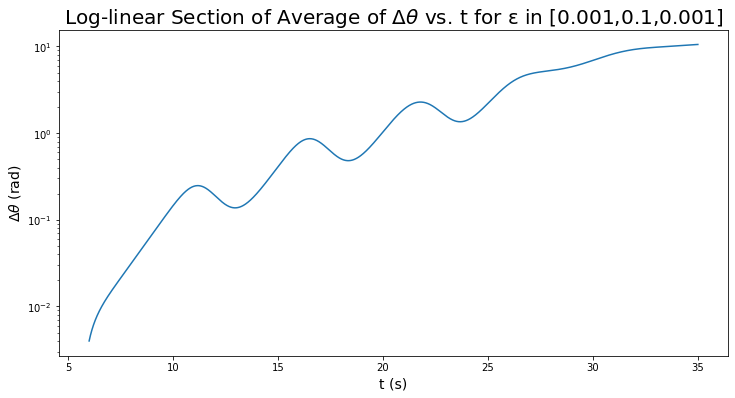

In [97]:
lower_bound=int(6/1e-3)
upper_bound=int(35/1e-3)
t=p1.tarray[lower_bound:upper_bound]
linear_section=avg_diff[lower_bound:upper_bound]

fig = plt.figure(figsize = [12,6])
plt.semilogy(t, linear_section)
plt.ylabel('$\Delta \\theta$ (rad)', fontsize = 14)
plt.xlabel('t (s)', fontsize = 14)
plt.title('Log-linear Section of Average of $\Delta \\theta$ vs. t for \u03B5 in [0.001,0.1,0.001]',fontsize=20)
plt.show()

Looking at the linear section of the average of $\Delta \theta$ vs. $t$ graph, I estimate Lyapunov Exponent $\lambda \approx 7 > 0$, which means the system is chaotic as $\theta$ of the 2 nearly identical pendulums diverge.

2. Calculate Poincaré sections for the pendulum as it undergoes the period-doubling route to chaos. Plot $\omega$ versus $\theta$, with one point plotted for each drive cycle. Do this for $F_D =$ 1.4, 1.44, 1.465, 1.481, and 1.49 using the parameters $l = g = 9.8,~\Omega_D = 2/3,~\nu = 0.5,~\omega(0) = 0,~\theta(0) = 0.2$. You should find that the attractor in the period 1 regime will contain only a single point. Likewise, if the behavior is period $n$ the attractor will contain $n$ discrete points. Be careful to remove the points corresponding to the initial transient. You must also be careful to account for the fact that time increases in discrete steps of $\Delta t$, so you will actually extract points for your Poincar ́e section when $\lvert t - 2n\pi/\Omega_D \rvert < \Delta t/2$. Use a step size of $\Delta t = 0.005$ or smaller for this problem.